In [1]:
import pandas as pd
import numpy as np

import sympy
from sympy import ordered, Matrix, hessian, Trace
# from sympy.vector import laplacian, divergence, gradient, curl, CoordSys3D, Del
from sympy.plotting import plot3d

import matplotlib.pyplot as plt

In [2]:
## 2D Gaussian Distribution Test
fstr = "(1/(2*pi*1**2))*exp(-(x**2+v**2)/(2*1**2))"
x_min =-3
x_max=3
y_min=-3
y_max=3
resolution = 0.5
x_steps = np.arange(x_min, x_max, resolution)
y_steps = np.arange(y_min, y_max, resolution)
nx = len(x_steps)
ny = len(y_steps)

In [3]:
f = sympy.parsing.sympy_parser.parse_expr(fstr, evaluate=False)
f

1*exp((-v**2 - x**2)/((2*1**2)))/(2*pi*1**2)

In [4]:
# get our variables
# x,y = sympy.symbols('x y')
x, y = list(sympy.ordered(f.free_symbols))
x, y

(v, x)

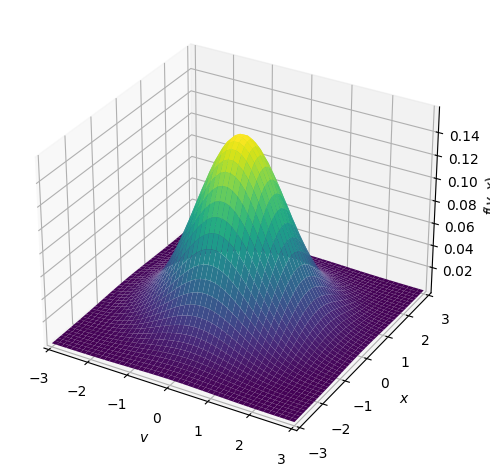

In [5]:
pcm = plot3d(f, (x, x_min, x_max), (y, y_min, y_max))

In [6]:
## Using sympy to calculate the gradient
# from sympy.vector import CoordSys3D, gradient

## 3D Gradient
# def gradient3d(f, v):
#     return (f.diff(v[0]), f.diff(v[1]))

gradient = lambda f, v: Matrix([f]).jacobian(v)

gf = gradient(f, (x,y))
gf

Matrix([[-1/(2*pi)*v*exp((-v**2 - x**2)/((2*1**2))), -1/(2*pi)*x*exp((-v**2 - x**2)/((2*1**2)))]])

Text(0.5, 1.0, 'vector field')

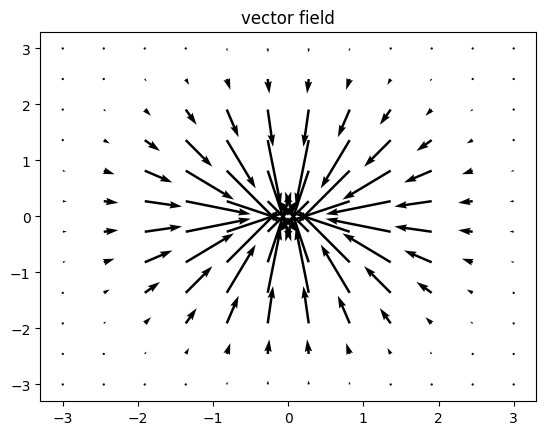

In [7]:
# convert sympy gradient to matrix for plotting
xrange = np.linspace(x_min,x_max,nx)
yrange = np.linspace(y_min,y_max,ny)
X,Y = np.meshgrid(xrange, yrange)

U=X
V=Y

# As an alternative to subs one could use lambdify from sympy.utilities
from sympy.utilities.lambdify import lambdify
f1 = lambdify([x, y], gf[0])
f2 = lambdify([x, y], gf[1])

U=[f1(x1,y1) for x1,y1 in zip(X,Y)]
V=[f2(x1,y1) for x1,y1 in zip(X,Y)]

plt.quiver(X,Y,U,V, linewidth=1)
plt.title("vector field")

https://mathworld.wolfram.com/NormalVector.html

The normal vector, $\vec{N}$,  at a point $(x_0,y_0)$ on a surface $z=f(x,y)$ is given by

$$
\vec{N} = \begin{bmatrix} f_x(x_0,y_0) \\ f_y(x_0,y_0) \\ -1 \end{bmatrix}, 
$$

where $f_x=\partial{f}/\partial{x}$ and $f_y=\partial{f}/\partial{y}$ are partial derivatives.

A normal vector to a plane specified by $ f(x,y,z)=ax+by+cz+d=0 $ is given by
$$
 \vec{N} = \nabla{f}=\begin{bmatrix} a \\ b \\ c \end{bmatrix}
$$
where $\nabla{f}$ denotes the gradient of $f$.

For a three-dimensional surface defined implicitly by $F(x,y,z)=0$, a unit normal is given by 

$$
\hat{N} = \frac{\nabla F}{|\nabla F|}
$$

where $|\nabla F|$ (sometimes denoted $|| \nabla F ||$) is norm (or length) of $\nabla F$

If a surface $S$ is given implicitly as the set of points $(x, y, z)$ satisfying  $F(x, y, z) = 0,$ then a normal at a point $(x, y, z)$ on the surface is given by the gradient

$$
\mathbf{n} = \nabla F(x, y, z).
$$

since the gradient at any point is perpendicular to the level set $S$.

For a surface $S$ in $\R^3$ given as the graph of a function $z = f(x, y),$ an upward-pointing normal can be found either from the parametrization $\mathbf{r}(x,y)=(x,y,f(x,y)),$ giving

$$
\mathbf{n} = \frac{\partial \mathbf{r}}{\partial x} \times \frac{\partial \mathbf{r}}{\partial y}
= \left(1,0,\tfrac{\partial f}{\partial x}\right) \times \left(0,1,\tfrac{\partial f}{\partial y}\right)
= \left(-\tfrac{\partial f}{\partial x},
-\tfrac{\partial f}{\partial y},1\right);
$$

or more simply from its implicit form $F(x, y, z) = z-f(x,y) = 0,$ giving 

$$
\mathbf{n} = \nabla F(x, y, z) = \left(-\tfrac{\partial f}{\partial x}, -\tfrac{\partial f}{\partial y}, 1 \right).
$$ 

Since a surface does not have a tangent plane at a singular point, it has no well-defined normal at that point: for example, the vertex of a cone. In general, it is possible to define a normal almost everywhere for a surface that is Lipschitz continuous.

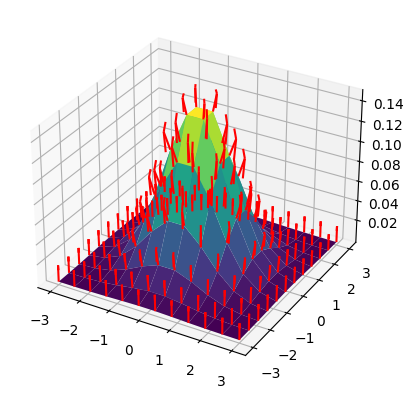

In [8]:
xrange = np.linspace(x_min,x_max,nx)
yrange = np.linspace(y_min,y_max,ny)
X,Y = np.meshgrid(xrange, yrange)

Z = np.empty(shape=(ny, nx))
U = np.empty(shape=(ny, nx))
V = np.empty(shape=(ny, nx))
W = np.empty(shape=(ny, nx))

f_x = lambdify([x, y], f.diff(x))
f_y = lambdify([x, y], f.diff(y))

scale = 2
zscale = 60
for i in range(len(xrange)):
    for j in range(len(yrange)):
        Z[j, i] = f.subs({x: xrange[i], y: yrange[j]})
        U[j, i] = -f_x(xrange[i], yrange[j])*scale
        V[j, i] = -f_y(xrange[i], yrange[j])*scale
        W[j, i] = 1/120*scale

# plt.matshow(Z)
# plt.matshow(U)
# plt.matshow(V)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.quiver(X, Y, Z, U, V, W,color='r') # , length=0.1, normalize=True)
# ax.set_zlim3d(0, 1)

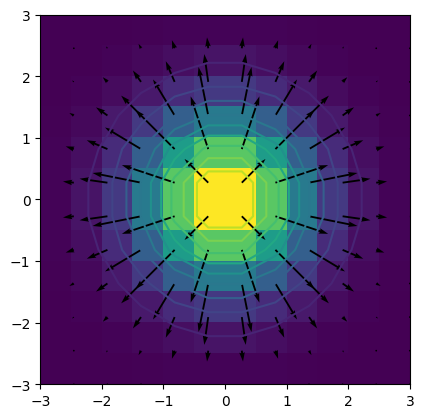

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(Z, extent=[x_min, x_max, y_min, y_max])
ax.contour(X, Y, Z, 10)
ax.quiver(X, Y, U, V, linewidth=1)

## https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s
# 37:42 - 38:00

In [10]:
from sympy import symbols, Matrix, Transpose

u, v, x, y = symbols('u v x y')

f = Matrix([sympy.cos(u), sympy.sin(u), v])
df = f.jacobian([u,v])
df
# take cross product of df with itself
N = f.diff(u).cross(f.diff(v))
N
dN = N.diff(u) + N.diff(v)
dN

# .replace(sympy.Abs, lambda e: e)) simply removes the abs() function
k_Nu = (f.diff(u).dot(N.diff(u)))/((f.diff(u).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nu.simplify()
k_Nv = (f.diff(v).dot(N.diff(v)))/((f.diff(v).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nv.simplify()
k_Nu, k_Nv

(1, 0)

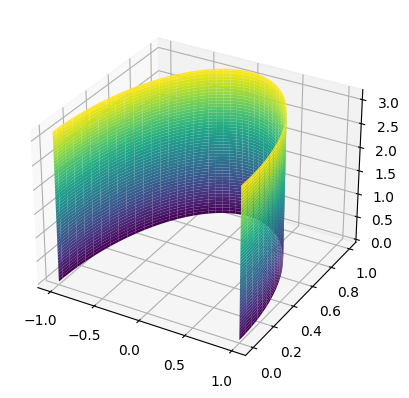

In [11]:
## Plot our parametric surface
Ur = np.linspace(0, 3.14, 100)
Vr = np.linspace(0, 3.14, 100)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = V
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')

## https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s
# 43:00

In [43]:
u, v, x, y = symbols('u v x y')

# Evaluate at Point p
p = [1,1]
print('p'); display(p)

# input function
f = Matrix([sympy.cos(u), sympy.sin(u), u+v])
# f = Matrix([u, v, 2*u**3+v**2])
# f =  Matrix([u, v, 0.0074309364675612406 * u**0 * v**0 + 5.47357899196928e-06 * u**1 * v**0 + -1.3343667748093953e-05 * u**2 * v**0 + -2.2145099553893485e-09 * u**3 * v**0 + 1.138031730306762e-08 * u**4 * v**0 + -3.8934937682835766e-05 * u**0 * v**1 + -5.0974652508101104e-08 * u**1 * v**1 + 1.2467614091890012e-06 * u**2 * v**1 + 2.6466497067191282e-09 * u**3 * v**1 + -5.533383835000518e-05 * u**0 * v**2 + -2.289366491156733e-09 * u**1 * v**2 + 2.0711187146273883e-07 * u**2 * v**2 + 1.8308947323919917e-07 * u**0 * v**3 + 2.871618723015514e-09 * u**1 * v**3 + 4.5370182034072814e-08 * u**0 * v**4])
# f = Matrix([u, v, u*v])
print('f'); display(f)
# derivative of f
df = gradient(f, (u,v))
# df = f.jacobian([u,v])
print('df'); display(df)
# Find normal by taking cross product of df/du and df/dv
N = f.diff(u).cross(f.diff(v)) #/(f.diff(u).cross(f.diff(v))).norm()
print('N'); display(N)
# derivative of N
# dN = N.jacobian([u,v])
dN = gradient(N, (u,v))
print('dN'); display(dN)
## Shape operator: df * S = dN
S = df.solve(dN)
## Shape operator: Sx(v) = -grad_v U
# S = -gradient(N, [u,v]).subs({u: p[0], v: p[1]})
# S.row_del(2)

print(f'S({p})'); display(S)

X = S.eigenvects() #returns eigenvalues, eigenvects
# k = S.eigenvals().keys() #returns eigenvalues and their algebraic multiplicity
display(X)

k1 = X[0][0] # k[0]
k2 = X[1][0] # k[1]
X1 = X[0][2][0]
X2 = X[1][2][0]
# calculate the curvature vector of the surface
k1vec = (df * X1)#.subs({u: p[0], v: p[1]})
k2vec = (df * X2)#.subs({u: p[0], v: p[1]})

print(f'k1: {k1}, k2: {k2}')
print('Curvature vectors:')
display(k1vec)
display(k2vec)
print(f'Are orthogonal: {abs(k1vec.dot(k2vec)) < 0.00000001} ({k1vec.dot(k2vec)})')

p


[1, 1]

f


Matrix([
[cos(u)],
[sin(u)],
[ u + v]])

df


Matrix([
[-sin(u), 0],
[ cos(u), 0],
[      1, 1]])

N


Matrix([
[cos(u)],
[sin(u)],
[     0]])

dN


Matrix([
[-sin(u), 0],
[ cos(u), 0],
[      0, 0]])

S([1, 1])


Matrix([
[ 1, 0],
[-1, 0]])

[(0,
  1,
  [Matrix([
   [0],
   [1]])]),
 (1,
  1,
  [Matrix([
   [-1],
   [ 1]])])]

k1: 0, k2: 1
Curvature vectors:


Matrix([
[0],
[0],
[1]])

Matrix([
[ sin(u)],
[-cos(u)],
[      0]])

Are orthogonal: True (0)


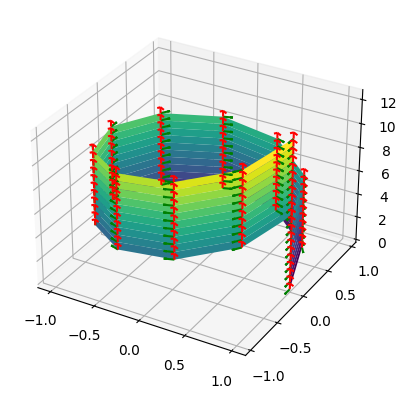

In [44]:
## Plot our parametric surface

res = 11
Ur = np.linspace(0, 2*3.14, res)
Vr = np.linspace(0, 2*3.14, res)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = U+V

U1 = np.empty(shape=(res, res))
V1 = np.empty(shape=(res, res))
W1 = np.empty(shape=(res, res))
U2 = np.empty(shape=(res, res))
V2 = np.empty(shape=(res, res))
W2 = np.empty(shape=(res, res))

scale = 1
zscale = 1
for i in range(res):
    for j in range(res):
        U1[j, i] = k1vec[0].subs({u: Ur[i], v: Vr[j]})
        V1[j, i] = k1vec[1].subs({u: Ur[i], v: Vr[j]})
        W1[j, i] = k1vec[2].subs({u: Ur[i], v: Vr[j]})
        U2[j, i] = k2vec[0].subs({u: Ur[i], v: Vr[j]})
        V2[j, i] = k2vec[1].subs({u: Ur[i], v: Vr[j]})
        W2[j, i] = k2vec[2].subs({u: Ur[i], v: Vr[j]})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.quiver(X, Y, Z, U1, V1, W1,color='r', length=0.5) # , length=0.1, normalize=True)
ax.quiver(X, Y, Z, U2, V2, W2,color='g', length=0.1)

The following summarizes the calculation of the above quantities relative to a Monge patch f(u, v) = (u, v, h(u, v)). Here hu and hv denote the two partial derivatives of h, with analogous notation for the second partial derivatives. The second fundamental form and all subsequent quantities are calculated relative to the given choice of unit normal vector field.

https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Shape_operator

In [ ]:
u, v, x, y = symbols('u v x y')

# f = u**2+v**2
# f = 2*u**3+v**2
f = 0.0074309364675612406 * u**0 * v**0 + 5.47357899196928e-06 * u**1 * v**0 + -1.3343667748093953e-05 * u**2 * v**0 + -2.2145099553893485e-09 * u**3 * v**0 + 1.138031730306762e-08 * u**4 * v**0 + -3.8934937682835766e-05 * u**0 * v**1 + -5.0974652508101104e-08 * u**1 * v**1 + 1.2467614091890012e-06 * u**2 * v**1 + 2.6466497067191282e-09 * u**3 * v**1 + -5.533383835000518e-05 * u**0 * v**2 + -2.289366491156733e-09 * u**1 * v**2 + 2.0711187146273883e-07 * u**2 * v**2 + 1.8308947323919917e-07 * u**0 * v**3 + 2.871618723015514e-09 * u**1 * v**3 + 4.5370182034072814e-08 * u**0 * v**4
# f_ = Matrix([u, v, f])
h = f
p=[20,20]

# df = gradient(f, (u,v))
df = f.diff(u) + f.diff(v)
display(df)

h_u = h.diff(u)
h_v = h.diff(v)
h_uu = h_u.diff(u)
h_uv = h_u.diff(v)
h_vv = h_v.diff(v)

n =  sympy.Matrix([-h_u,-h_v,1]) / sympy.sqrt(1 + h_u**2 + h_v**2)
n = n.subs({u: p[0], v: p[1]})
display(n)

E = 1+h_u**2
F = h_u*h_v
G = 1+h_v**2
denom = sympy.sqrt(1 + h_u**2 + h_v**2)
L = h_uu / denom
M = h_uv / denom
N = h_vv / denom
S = sympy.Matrix([[L,M],[M,N]]) * sympy.Matrix([[E,F],[F,G]]).T
display(S)
S = S.subs({u: p[0], v: p[1]})
display(S)
# S = sympy.Matrix([[h_uu(1+h_v**2)],[]]) / (1 + h_u**2 + h_v**2)**(3/2)

X = S.eigenvects() #returns eigenvalues, eigenvects

print('X'); display(X)

k1 = X[0][0]
k2 = X[1][0]
X1 = X[0][2][0]
X2 = X[1][2][0]
# calculate the curvature vector of the surface
# k1vec = (df * X1).subs({v[0]: p[0], v[1]: p[1]})
# k2vec = (df * X2).subs({v[0]: p[0], v[1]: p[1]})

print('x1');display(X1.evalf())
print('x2');display(X2.evalf())

k1vec = sympy.Matrix([X1[0],X1[1],df.subs({u: X1[0], v: X1[1]})]).evalf()
k2vec = sympy.Matrix([X2[0],X2[1],df.subs({u: X2[0], v: X2[1]})]).evalf()

display(k1,k2,k1vec,k2vec)

4.81679189189896e-8*u**3 + 4.22163692045635e-7*u**2*v + 1.24011787932283e-6*u**2 + 4.22838599094524e-7*u*v**2 + 2.48894408539569e-6*u*v - 2.6738310148696e-5*u + 1.84352346859307e-7*v**3 + 5.46979053226441e-7*v**2 - 0.000110718651352518*v - 3.34613586908665e-5

Matrix([
[-0.00422893487664686],
[-0.00331895233034007],
[   0.999985550228221]])

Matrix([
[ (7.12213875886091e-10*(0.00170572551983591*u**3 + 0.000297517491818977*u**2*v - 0.000248939421738713*u**2 + 0.0155213600467775*u*v**2 + 0.0934346862291361*u*v - u + 0.000107602301602035*v**3 - 8.578475327684e-5*v**2 - 0.00191006901065048*v + 0.205100242875545)**2 + 1)*(1.36563807636811e-7*u**2 + 1.58798982403148e-8*u*v - 1.32870597323361e-8*u + 4.14223742925478e-7*v**2 + 2.493522818378e-6*v - 2.66873354961879e-5)/sqrt(1.2247334666178e-8*(2.39152911278102e-5*u**3 + 0.00374295146764781*u**2*v + 0.011265813527184*u**2 + 7.7844375394263e-5*u*v**2 - 4.13737156037454e-5*u*v - 0.000460610125992609*u + 0.00163987113082924*v**3 + 0.00496322355448478*v**2 - v - 0.351818515069921)**2 + 7.12213875886091e-10*(0.00170572551983591*u**3 + 0.000297517491818977*u**2*v - 0.000248939421738713*u**2 + 0.0155213600467775*u*v**2 + 0.0934346862291361*u*v - u + 0.000107602301602035*v**3 - 8.578475327684e-5*v**2 - 0.00191006901065048*v + 0.205100242875545)**2 + 1) + (7.93994912015738e-9*u**2 + 8.28447

Matrix([
[0.000249590658462718, 0.000387730995110691],
[0.000387734387901814, 0.000301574147755069]])

X


[(-0.000113020492981134,
  1,
  [Matrix([
   [-0.73037002511923],
   [0.683051701123228]])]),
 (0.000664185299198921,
  1,
  [Matrix([
   [-0.683048512787574],
   [-0.730373006892875]])])]

x1


Matrix([
[-0.73037002511923],
[0.683051701123228]])

x2


Matrix([
[-0.683048512787574],
[-0.730373006892875]])

-0.000113020492981134

0.000664185299198921

Matrix([
[  -0.73037002511923],
[  0.683051701123228],
[-8.9834300688088e-5]])

Matrix([
[ -0.683048512787574],
[ -0.730373006892875],
[6.73950684466546e-5]])

: 